1. Data Loading and Initial Exploration

In [1]:
import pandas as pd

# Load the datasets
datasets = {
    'companies': pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\companies\companies.csv'),
    'company_industries':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\companies\company_industries.csv'),
    'company_specialities':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\companies\company_specialities.csv'),
    'employee_counts':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\companies\employee_counts.csv'),
    'benefits':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\jobs\benefits.csv'),
    'job_industries':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\jobs\job_industries.csv'),
    'job_skills': pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\jobs\job_skills.csv'),
    'salaries':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\jobs\salaries.csv'),
    'industries':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\mappings\industries.csv'),
    'skills':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\mappings\skills.csv'),
    'postings':  pd.read_csv(r'C:\Users\beema\Downloads\Linkedindataset\postings.csv')
}


In [2]:
# Display info and first few rows of all DataFrames
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info(), '\n')
    print(df.head(), '\n')
    print('-' * 80)

Dataset: companies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    24473 non-null  int64  
 1   name          24472 non-null  object 
 2   description   24176 non-null  object 
 3   company_size  21699 non-null  float64
 4   state         24451 non-null  object 
 5   country       24473 non-null  object 
 6   city          24472 non-null  object 
 7   zip_code      24445 non-null  object 
 8   address       24451 non-null  object 
 9   url           24473 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB
None 

   company_id                        name  \
0        1009                         IBM   
1        1016               GE HealthCare   
2        1025  Hewlett Packard Enterprise   
3        1028                      Oracle   
4        1033                   Accenture   

                

2. Handle missing values

In [3]:
# Check for missing values in all datasets
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}
print(missing_values)

{'companies': company_id         0
name               1
description      297
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64, 'company_industries': company_id    0
industry      0
dtype: int64, 'company_specialities': company_id    0
speciality    0
dtype: int64, 'employee_counts': company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64, 'benefits': job_id      0
inferred    0
type        0
dtype: int64, 'job_industries': job_id         0
industry_id    0
dtype: int64, 'job_skills': job_id       0
skill_abr    0
dtype: int64, 'salaries': salary_id                0
job_id                   0
max_salary            6838
med_salary           33947
min_salary            6838
pay_period               0
currency                 0
compensation_type        0
dtype: int64, 'industries': industry_id       0
industry_name    34
dtype: int64, 'skills':

In [4]:
# Handle missing values in the companies dataset
companies = datasets['companies'].copy()
companies = companies.dropna(subset=['name'])
companies.loc[:, 'description'] = companies['description'].fillna('No description available')
companies.loc[:, 'company_size'] = companies['company_size'].fillna(companies['company_size'].median())
companies.loc[:, 'state'] = companies['state'].fillna(companies['state'].mode()[0])
companies = companies.dropna(subset=['city'])
companies.loc[:, 'zip_code'] = companies['zip_code'].fillna('00000')
companies.loc[:, 'address'] = companies['address'].fillna('No address available')

# Handle missing values in the salaries dataset
salaries = datasets['salaries'].copy()
salaries.loc[:, 'max_salary'] = salaries['max_salary'].fillna(salaries['max_salary'].median())
salaries.loc[:, 'med_salary'] = salaries['med_salary'].fillna(salaries['med_salary'].median())
salaries.loc[:, 'min_salary'] = salaries['min_salary'].fillna(salaries['min_salary'].median())

# Handle missing values in the postings dataset
postings = datasets['postings'].copy()
postings = postings.dropna(subset=['company_name'])
postings.loc[:, 'description'] = postings['description'].fillna('No description available')
postings.loc[:, 'max_salary'] = postings['max_salary'].fillna(postings['max_salary'].median())
postings.loc[:, 'med_salary'] = postings['med_salary'].fillna(postings['med_salary'].median())
postings.loc[:, 'min_salary'] = postings['min_salary'].fillna(postings['min_salary'].median())
postings.loc[:, 'pay_period'] = postings['pay_period'].fillna(postings['pay_period'].mode()[0])
postings = postings.dropna(subset=['company_id'])
postings.loc[:, 'views'] = postings['views'].fillna(postings['views'].median())
postings.loc[:, 'applies'] = postings['applies'].fillna(postings['applies'].median())
postings.loc[:, 'remote_allowed'] = postings['remote_allowed'].fillna(postings['remote_allowed'].mode()[0])
postings.loc[:, 'application_url'] = postings['application_url'].fillna('No application URL')
postings.loc[:, 'formatted_experience_level'] = postings['formatted_experience_level'].fillna(postings['formatted_experience_level'].mode()[0])
postings.loc[:, 'skills_desc'] = postings['skills_desc'].fillna('No skills listed')
postings.loc[:, 'posting_domain'] = postings['posting_domain'].fillna('No domain')
postings.loc[:, 'currency'] = postings['currency'].fillna(postings['currency'].mode()[0])
postings.loc[:, 'compensation_type'] = postings['compensation_type'].fillna(postings['compensation_type'].mode()[0])

# Handle missing values in the industries dataset
industries = datasets['industries'].copy()
industries.loc[:, 'industry_name'] = industries['industry_name'].fillna('Unknown Industry')

In [5]:
postings.head

<bound method NDFrame.head of             job_id                     company_name  \
0           921716            Corcoran Sawyer Smith   
2         10998357           The National Exemplar    
3         23221523           Abrams Fensterman, LLP   
5         91700727        Downtown Raleigh Alliance   
6        103254301                       Raw Cereal   
...            ...                              ...   
123844  3906267117                     Lozano Smith   
123845  3906267126                        Pinterest   
123846  3906267131                     EPS Learning   
123847  3906267195  Trelleborg Applied Technologies   
123848  3906267224                        Solugenix   

                                                    title  \
0                                   Marketing Coordinator   
2                             Assitant Restaurant Manager   
3       Senior Elder Law / Trusts and Estates Associat...   
5                Economic Development and Planning Intern   
6   

3. Merging Datasets

In [6]:
# Merge company-related datasets
company_data = companies.merge(datasets['company_industries'], on='company_id', how='left')
company_data = company_data.merge(datasets['company_specialities'], on='company_id', how='left')
company_data = company_data.merge(datasets['employee_counts'], on='company_id', how='left')

company_data.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,314102,16253625,1712378162
1,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,313142,16309464,1713392385
2,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,313147,16309985,1713402495
3,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,311223,16314846,1713501255
4,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Mobile,314102,16253625,1712378162


In [7]:
# Merge job-related datasets
benefits = datasets['benefits'].copy()
job_data = benefits.merge(datasets['job_industries'], on='job_id', how='left')
job_data = job_data.merge(datasets['job_skills'], on='job_id', how='left')
job_data = job_data.merge(datasets['salaries'], on='job_id', how='left')

job_data.head()

,job_id,inferred,type,industry_id,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,3887473071,0,Medical insurance,48.0,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3887473071,0,Vision insurance,48.0,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3887473071,0,Dental insurance,48.0,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3887473071,0,401(k),48.0,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3887473071,0,Student loan assistance,48.0,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Combine postings with company and job data in chunks
final_data = postings.merge(company_data, on='company_id', how='left', suffixes=('_posting', '_company'))
final_data = final_data.merge(job_data, on='job_id', how='left', suffixes=('', '_job'))

# Display the size of the final dataset
print(f"Final Data Shape: {final_data.shape}")

Final Data Shape: (7268019, 53)


4. Initial EDA

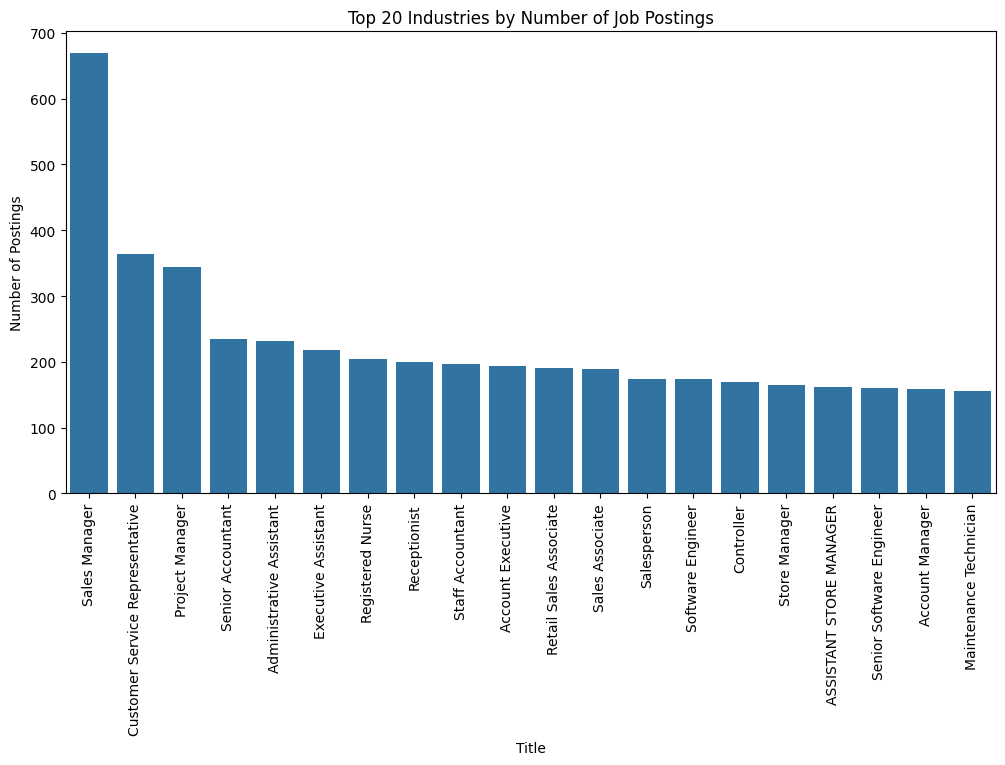

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of job postings by industry
plt.figure(figsize=(12, 6))
industry_count = postings['title'].value_counts().head(20)  # Top 20 industries
sns.barplot(x=industry_count.index, y=industry_count.values)
plt.title('Top 20 Industries by Number of Job Postings')
plt.xlabel('Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()

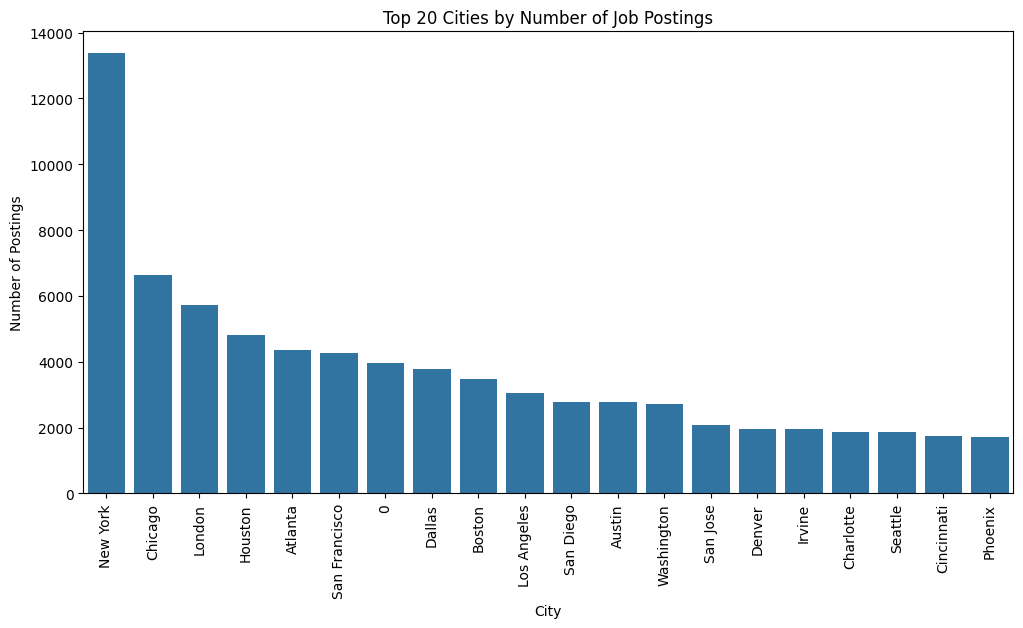

In [10]:
# Distribution of job postings by city
plt.figure(figsize=(12, 6))
city_count = company_data['city'].value_counts().head(20)  # Top 20 cities
sns.barplot(x=city_count.index, y=city_count.values)
plt.title('Top 20 Cities by Number of Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()

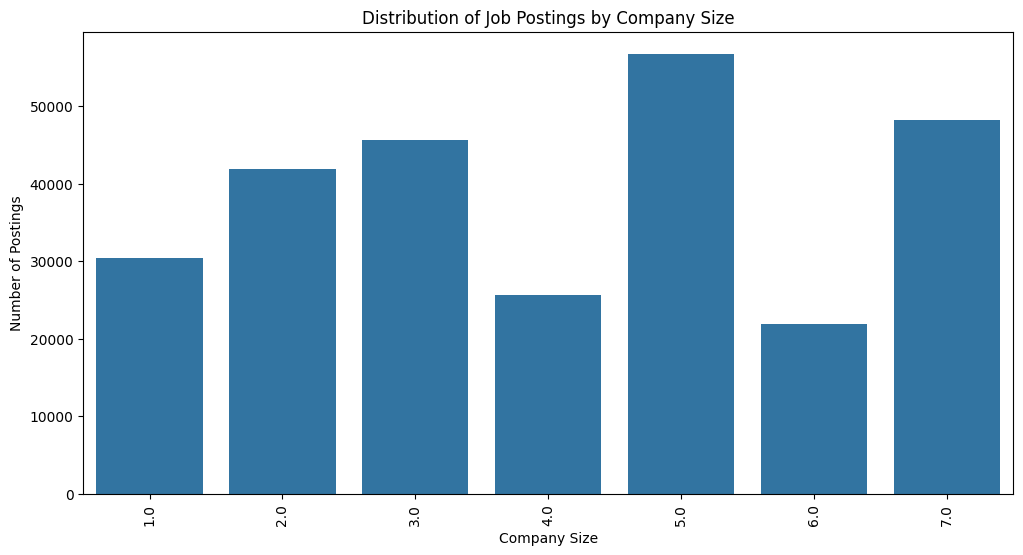

In [11]:
# Distribution of job postings by company size
plt.figure(figsize=(12, 6))
company_size_count = company_data['company_size'].value_counts()
sns.barplot(x=company_size_count.index, y=company_size_count.values)
plt.title('Distribution of Job Postings by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()


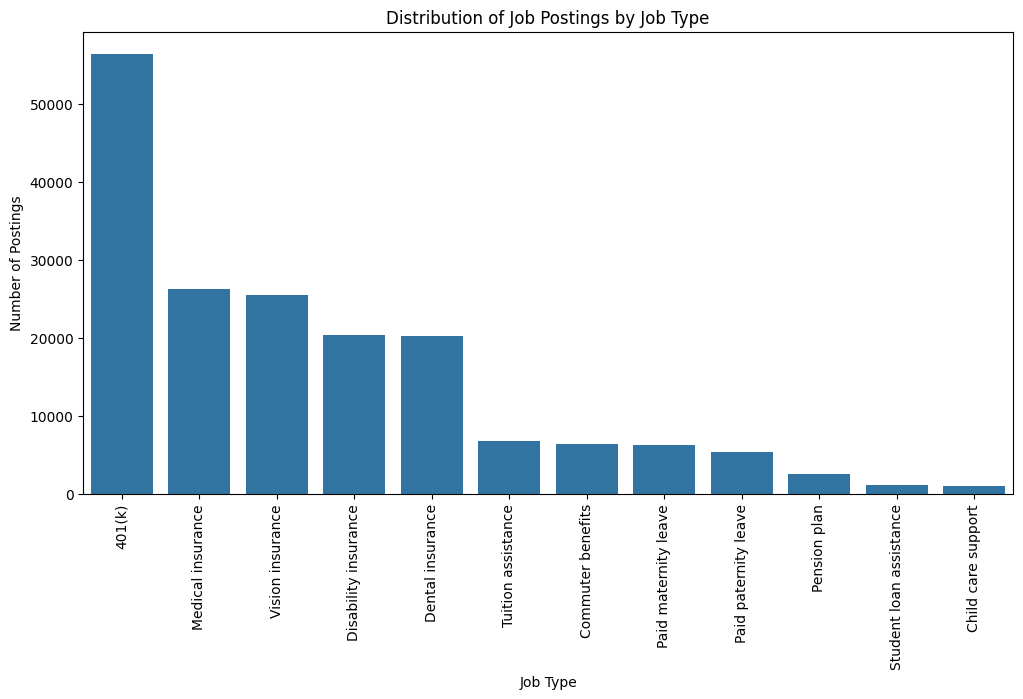

In [12]:
# Distribution of job postings by job type
plt.figure(figsize=(12, 6))
job_type_count = job_data['type'].value_counts()
sns.barplot(x=job_type_count.index, y=job_type_count.values)
plt.title('Distribution of Job Postings by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()


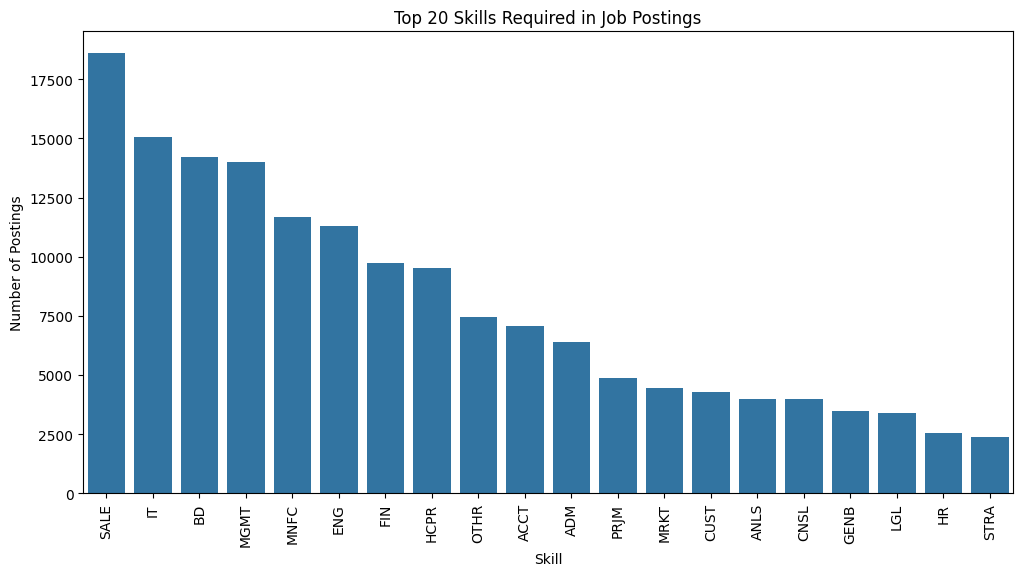

In [13]:
# Most common skills in job postings
plt.figure(figsize=(12, 6))
skill_count = job_data['skill_abr'].value_counts().head(20)  # Top 20 skills
sns.barplot(x=skill_count.index, y=skill_count.values)
plt.title('Top 20 Skills Required in Job Postings')
plt.xlabel('Skill')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()


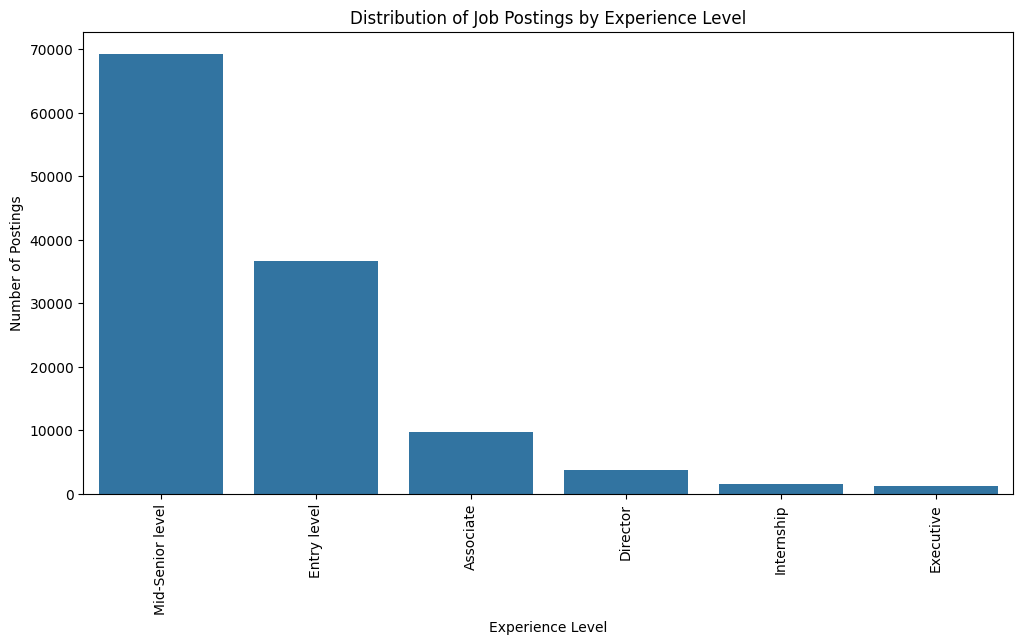

In [14]:
# Distribution of job postings by experience level
plt.figure(figsize=(12, 6))
experience_level_count = postings['formatted_experience_level'].value_counts()
sns.barplot(x=experience_level_count.index, y=experience_level_count.values)
plt.title('Distribution of Job Postings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()


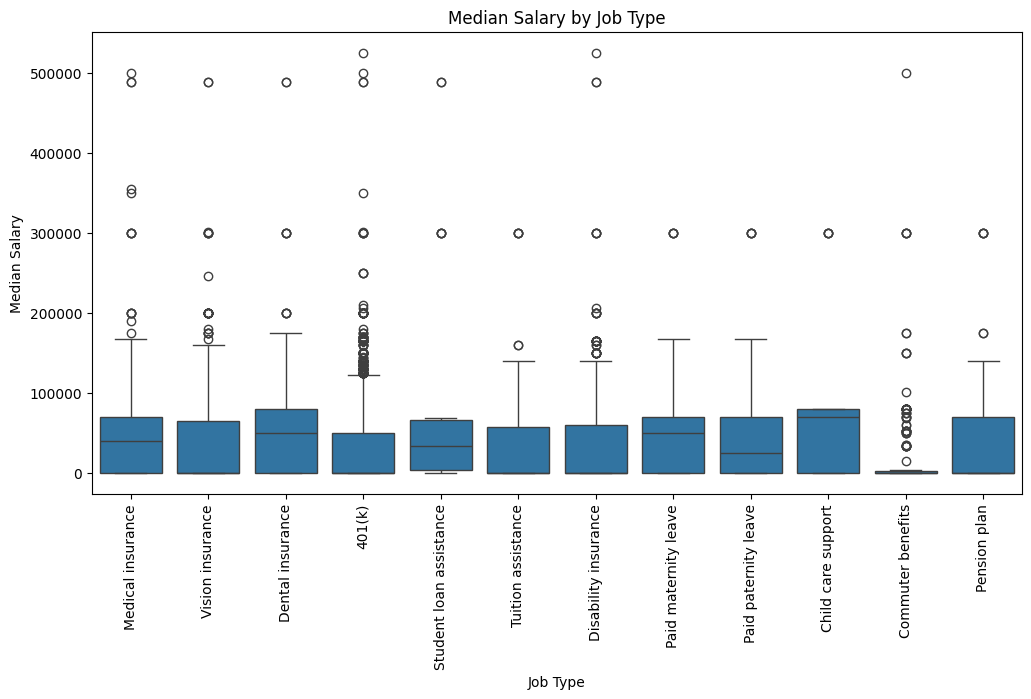

In [15]:
# Salary vs. job type
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='med_salary', data=job_data)
plt.title('Median Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Median Salary')
plt.xticks(rotation=90)
plt.show()


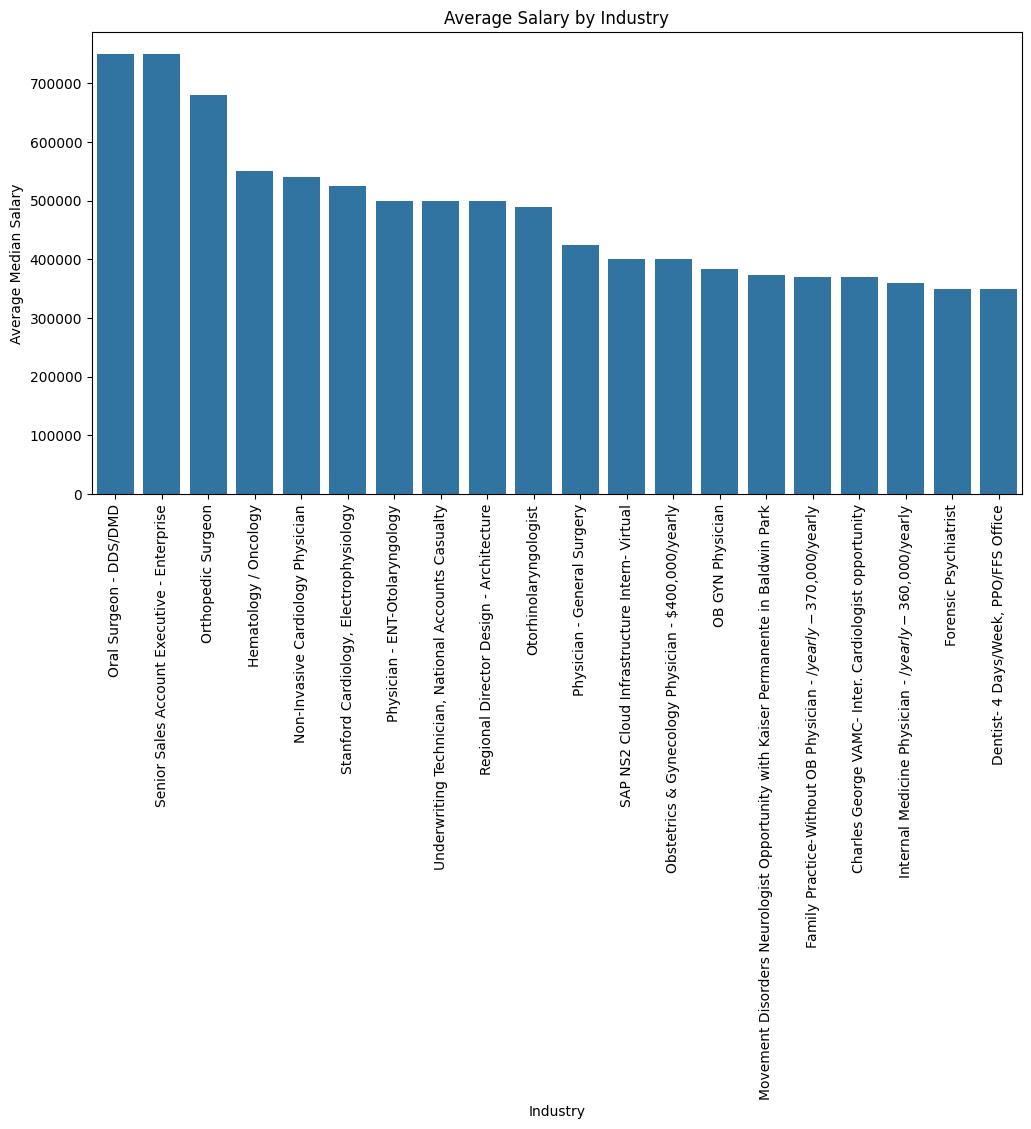

In [16]:
# Average salary by industry
industry_salary = postings.groupby('title')['med_salary'].mean().sort_values(ascending=False).head(20)  # Top 20 industries
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_salary.index, y=industry_salary.values)
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Median Salary')
plt.xticks(rotation=90)
plt.show()


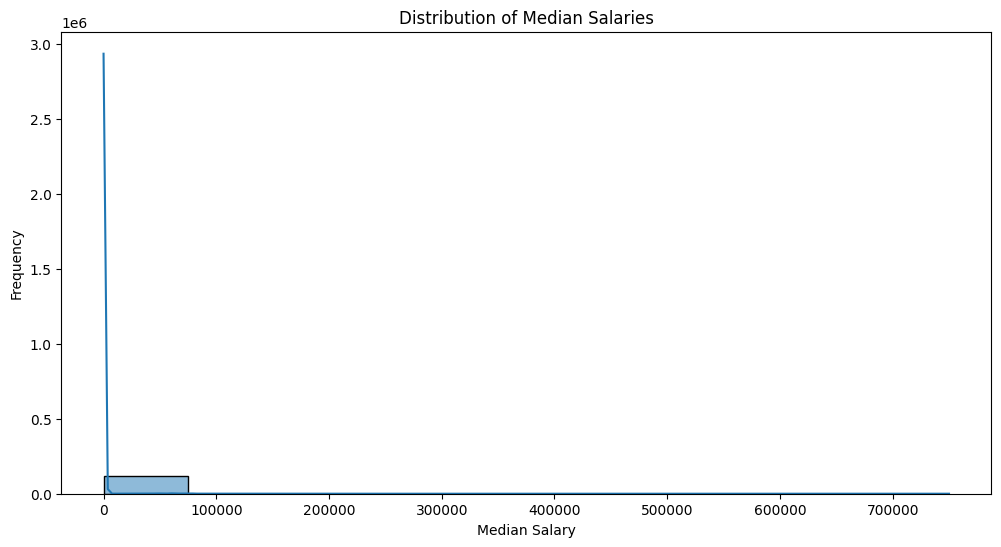

In [17]:
# Distribution of median salaries
plt.figure(figsize=(12, 6))
sns.histplot(postings['med_salary'].dropna(), kde=True, bins=10)
plt.title('Distribution of Median Salaries')
plt.xlabel('Median Salary')
plt.ylabel('Frequency')
plt.show()


5. Feature Engineering: 
Text Processing with NLP Techniques

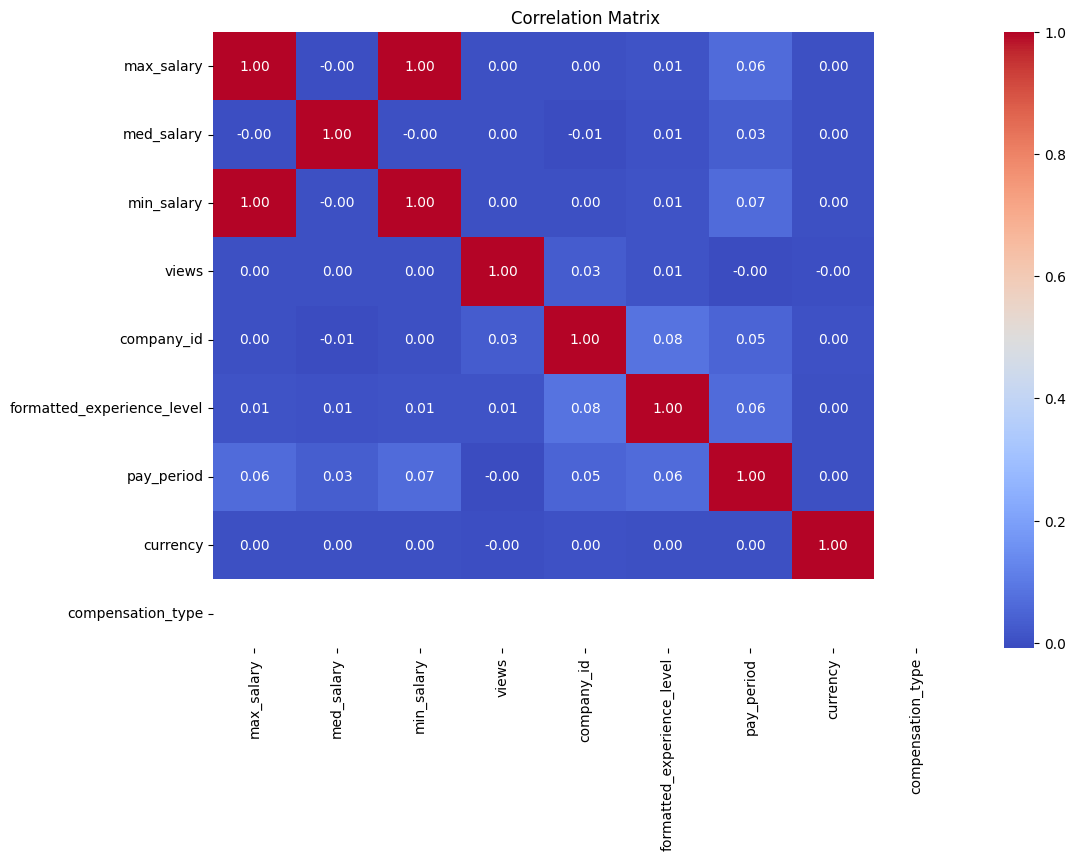

In [18]:
# Convert categorical columns to numeric using LabelEncoder for visualization
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['pay_period', 'formatted_experience_level', 'currency', 'compensation_type']:
    postings[col] = le.fit_transform(postings[col].astype(str))

# Select numeric columns for correlation
numeric_features = ['max_salary', 'med_salary', 'min_salary', 'views', 'company_id', 'formatted_experience_level', 'pay_period', 'currency', 'compensation_type']

# Create a correlation matrix
correlation_matrix = postings[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-hot encode categorical features
categorical_features = ['pay_period', 'formatted_experience_level', 'currency', 'compensation_type']
one_hot = OneHotEncoder()
categorical_encoded = one_hot.fit_transform(postings[categorical_features])

# Convert the sparse matrix to a DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded.toarray(), columns=one_hot.get_feature_names_out(categorical_features))

# Combine numeric and encoded categorical features
numeric_features_df = postings[['max_salary', 'med_salary', 'min_salary', 'views', 'company_id']]
final_features = pd.concat([numeric_features_df.reset_index(drop=True), categorical_encoded_df], axis=1)

# Define the target variable (assuming a binary classification task)
target = postings['applies'] > postings['applies'].median()  # Example target variable, adjust as needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size=0.2, random_state=42)



4. Model Building with XGBoost

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.97


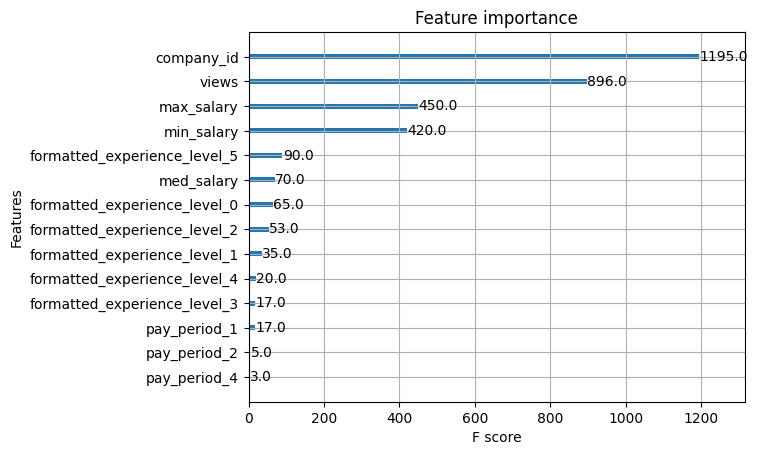

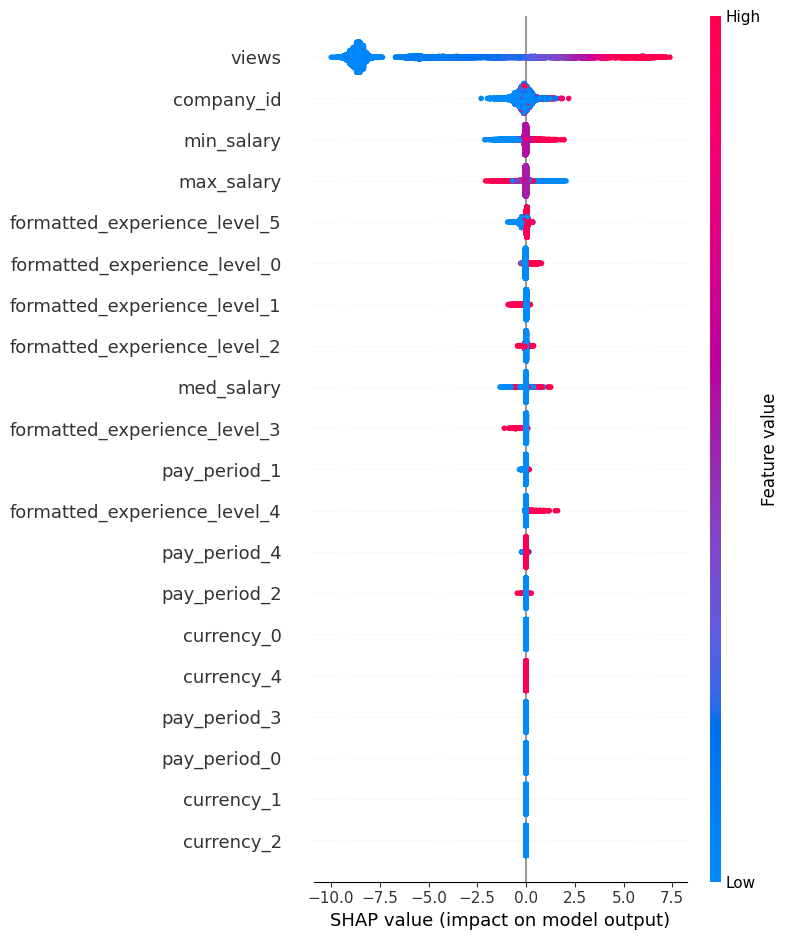

In [22]:
# Feature importance
xgb.plot_importance(model)
plt.show()

# SHAP values for interpretability
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)



              precision    recall  f1-score   support

       False       0.98      0.98      0.98     22430
        True       0.81      0.78      0.79      1996

    accuracy                           0.97     24426
   macro avg       0.89      0.88      0.89     24426
weighted avg       0.97      0.97      0.97     24426



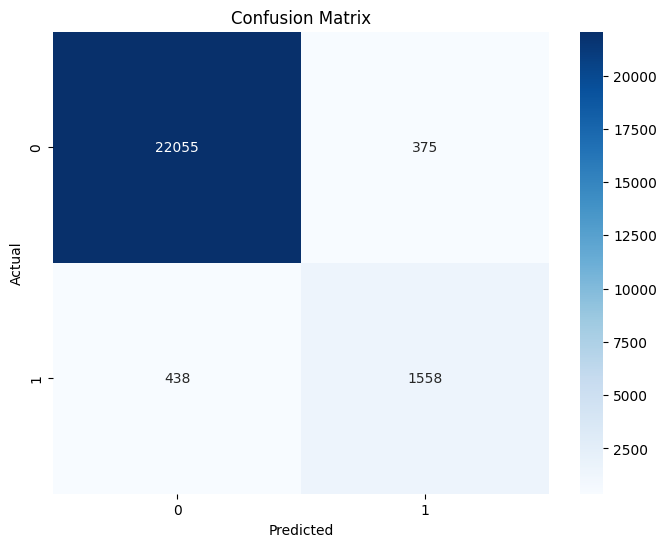

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
import joblib

# Save the model to a file
joblib.dump(model, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [ ]:
def recommend_jobs(user_profile, model, tfidf, one_hot, postings, top_n=5):
    # Process user profile
    user_tfidf = tfidf.transform([user_profile['description']])
    user_tfidf_df = pd.DataFrame(user_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    
    # Encode categorical features
    user_categorical = pd.DataFrame({
        'pay_period': [user_profile['pay_period']],
        'formatted_experience_level': [user_profile['experience_level']],
        'currency': [user_profile['currency']],
        'compensation_type': [user_profile['compensation_type']]
    })
    user_categorical_encoded = one_hot.transform(user_categorical)
    user_categorical_encoded_df = pd.DataFrame(user_categorical_encoded.toarray(), columns=one_hot.get_feature_names_out())
    
    # Combine user profile features with job-specific features for each job posting
    recommendations = []
    for index, row in postings.iterrows():
        job_numeric = pd.DataFrame({
            'max_salary': [row['max_salary']],
            'med_salary': [row['med_salary']],
            'min_salary': [row['min_salary']],
            'views': [row['views']],
            'company_id': [row['company_id']]
        })
        job_features = pd.concat([job_numeric.reset_index(drop=True), user_categorical_encoded_df, user_tfidf_df], axis=1)
        job_prediction = model.predict_proba(job_features)[:, 1][0]  # Assuming the second column is the probability of interest
        recommendations.append((index, job_prediction))
    
    # Combine predictions with job postings
    postings['prediction'] = [score for _, score in recommendations]
    
    # Sort and select top N recommendations
    top_recommendations = postings.sort_values(by='prediction', ascending=False).head(top_n)
    
    return top_recommendations



In [1]:
# Example user profile
user_profile = {
    'description': "Experienced software engineer with expertise in Python and machine learning.",
    'pay_period': 'YEARLY',
    'experience_level': 'Mid-Senior level',
    'currency': 'USD',
    'compensation_type': 'BASE_SALARY',
    'max_salary': 150000,
    'med_salary': 120000,
    'min_salary': 90000,
    'views': 100,
    'company_id': 123  # This should be a valid company_id in your data
}

# Recommend jobs for the user
recommended_jobs = recommend_jobs(user_profile, model, tfidf, one_hot, postings, top_n=5)
print(recommended_jobs)


NameError: name 'recommend_jobs' is not defined